## Data Science Regression Project: Predicting Home Prices in Banglore

In [22]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']= (20,10)
from pandas.plotting import scatter_matrix

In [23]:
#loading the dataset
df=pd.read_csv(r'C:\Users\RICHA\Downloads\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [24]:
#No.of rows and columns in dataset
df.shape

(13320, 9)

In [25]:
#Examaining area type feature
#No.of distinct area_type
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [26]:
#Count of distinct area_type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [27]:
#Dropping features that are not required
df1=df.drop(['area_type','availability','balcony','society'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning Process

In [28]:
#Handling NAN values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [30]:
#Filing the NAN values of bath feature with the median value of that feature
df1['bath'] = df1['bath'].fillna(df1['bath'].mean())
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [31]:
#Dropping columns containg NAN values
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df2.shape
#Size of the dataset chnaged from (13320, 9) to (13303, 5) i.e we dropped 17 columns

(13303, 5)

In [33]:
#Exploring size feature
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [34]:
#Converting size to bhk feature by spliting and taking only the numerical part 
#Converting object to int type
df2['bhk']=df2['size'].str.split(' ').str[0].astype('int')
df2.head()

C:\Users\RICHA\AppData\Local\Temp\ipykernel_29740\2945420939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].str.split(' ').str[0].astype('int')


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13303 non-null  object 
 3   bath        13303 non-null  float64
 4   price       13303 non-null  float64
 5   bhk         13303 non-null  int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 675.5+ KB


In [36]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [37]:
df2[df2.bhk>20]
#Since it's not possible to have so many bedrooms,thus,removing the columns

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [38]:
df2.total_sqft.unique()
#It contains range value which needs to be converted to single value

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
#Function to know values are float type
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
#To know the values of total_sqft which are not in float type
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.00000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.00000,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.69261,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.00000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.00000,63.770,2


In [41]:
#Function to take average of the range value\
def conv_sqft_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return(float(token[0])+ float(token[1]))/2
    try:
         return float (x)
    except:
        return None


In [42]:
conv_sqft_to_num('2040')

2040.0

In [43]:
conv_sqft_to_num('3010 - 3410')

3210.0

In [44]:
conv_sqft_to_num('34.46Sq. Meter')
#It won't return anything

In [45]:
#Creating deep copy of our original dataframe
df3=df2.copy()
df3['total_sqft']=df2['total_sqft'].apply(conv_sqft_to_num)
df3.head(40)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [46]:
#To know the value of the 30th row
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

array([[<AxesSubplot:xlabel='total_sqft', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='bath', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='bhk', ylabel='total_sqft'>,
        <AxesSubplot:xlabel='price', ylabel='total_sqft'>],
       [<AxesSubplot:xlabel='total_sqft', ylabel='bath'>,
        <AxesSubplot:xlabel='bath', ylabel='bath'>,
        <AxesSubplot:xlabel='bhk', ylabel='bath'>,
        <AxesSubplot:xlabel='price', ylabel='bath'>],
       [<AxesSubplot:xlabel='total_sqft', ylabel='bhk'>,
        <AxesSubplot:xlabel='bath', ylabel='bhk'>,
        <AxesSubplot:xlabel='bhk', ylabel='bhk'>,
        <AxesSubplot:xlabel='price', ylabel='bhk'>],
       [<AxesSubplot:xlabel='total_sqft', ylabel='price'>,
        <AxesSubplot:xlabel='bath', ylabel='price'>,
        <AxesSubplot:xlabel='bhk', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

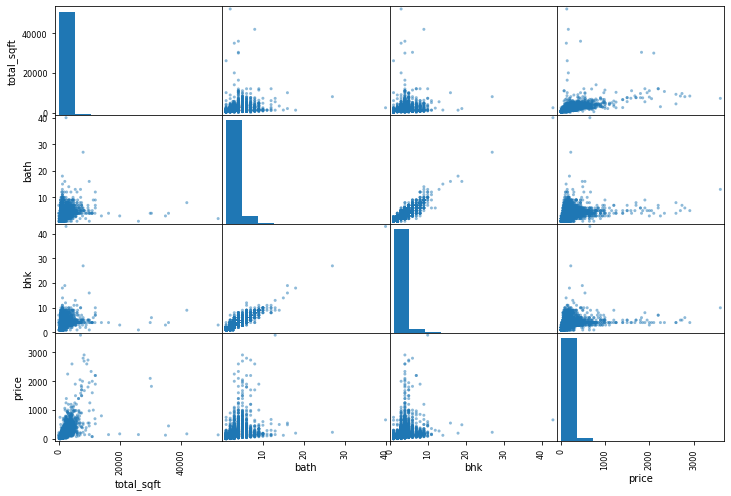

In [47]:
attributes = [ "size", "total_sqft", "bath","bhk",'price']
scatter_matrix(df3[attributes], figsize = (12,8))

## Feature Engineering

In [48]:
#To check no.of distinct location (location is a categorical feature)
df4=df3.copy()
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [49]:
#No.of unique location
len(df4.location.unique())

1304

In [50]:
#Data points available per location
#Strip extra spaces from location feature
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [51]:
len(location_stats[location_stats<=10])

1064

In [52]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [53]:
len(df4.location.unique())

1293

In [54]:
#To remove all the location having less than 10 datapoints i.e applying dimensionality reduction technique
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

271

In [55]:
df4.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


## Outlier Detection And Removal

In [56]:
#Creating new column called price per sqft column
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [57]:
#Finding outliers
df4[df4.total_sqft/df4.bhk<300]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [58]:
df4.shape

(13303, 7)

In [59]:
#Dropping all the rows having total_sqft/bhk<300
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [60]:
#Finding outliers in price_per_sqft
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [61]:
#Function to remove outliers in price_per_sqft per location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10255, 7)

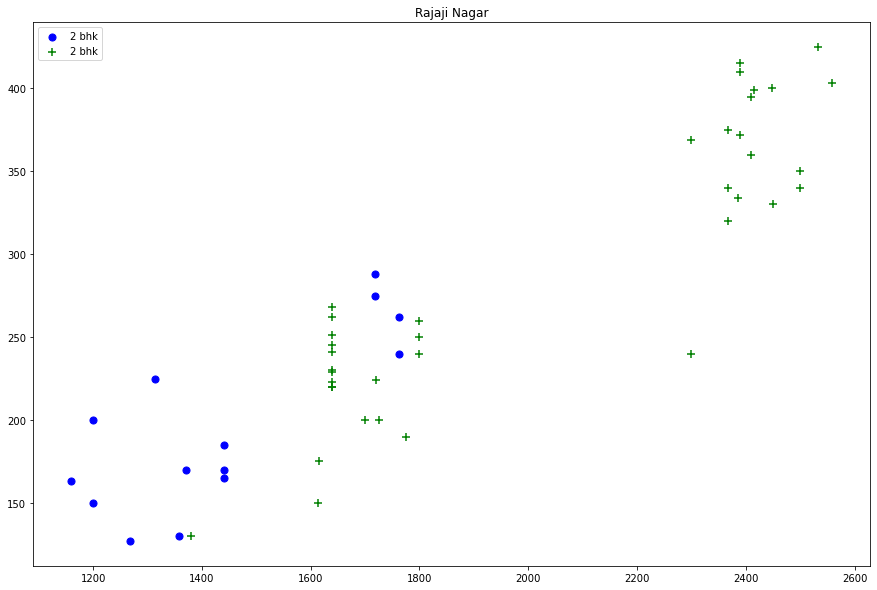

In [62]:
#Function to draw 2bhk and 3bhk apartment and see there respective price
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='2 bhk',s=50)
    plt.xlabel='Total Square Feet Area'
    plt.ylabel='Price Per Square Feet'
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,'Rajaji Nagar')
    

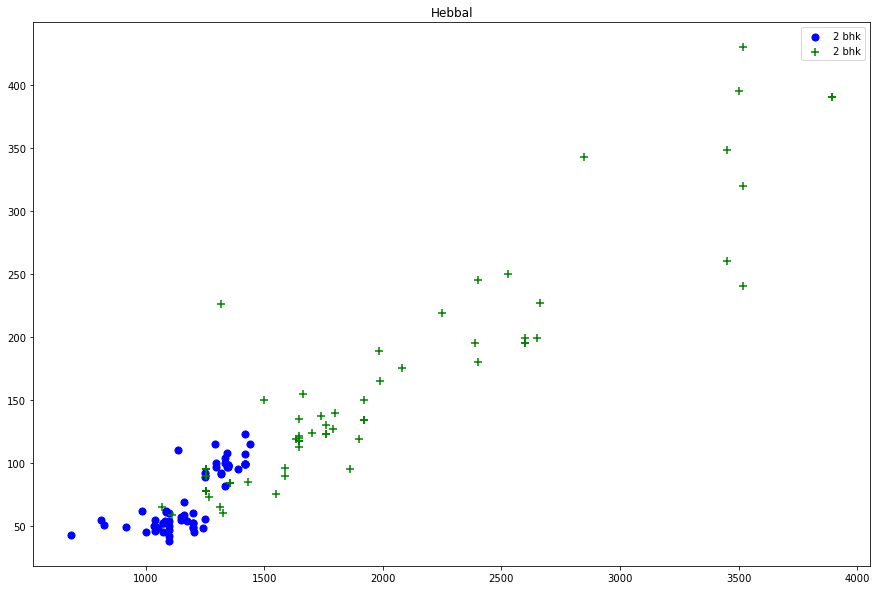

In [63]:
plot_scatter_chart(df3,'Hebbal')

#### Data points having same location are outliers since the price of say, 3 bedroom apartment is less than 2 bedroom apartment for same square ft area.

### To create a dictionary that will create a statistics of per bhk for a given location -

     {
       '1': {
             'mean' : 4000,
             'std' : 2000,
             'count' : 34
            }              
        
       '2': {
             'mean' : 4300,
             'std' : 2300,
             'count' : 42
            }              
                    

In [64]:
df6.shape

(10255, 7)

In [65]:
#Function to remove the 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment 
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7338, 7)

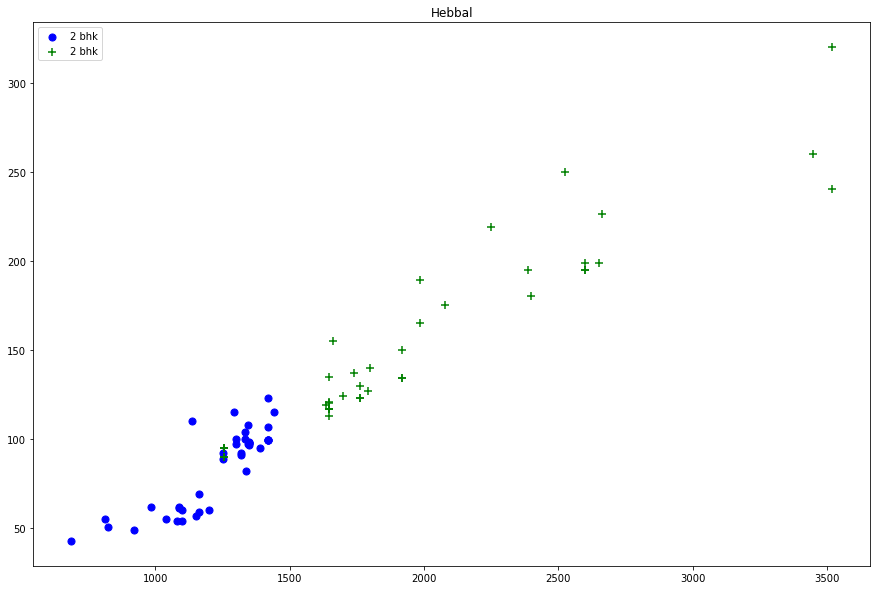

In [66]:
plot_scatter_chart(df7,'Hebbal')

(array([1.3255e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67829813e+02, 1.20024105e+06, 2.40021426e+06, 3.60018748e+06,
        4.80016070e+06, 6.00013391e+06, 7.20010713e+06, 8.40008035e+06,
        9.60005357e+06, 1.08000268e+07, 1.20000000e+07]),
 <BarContainer object of 10 artists>)

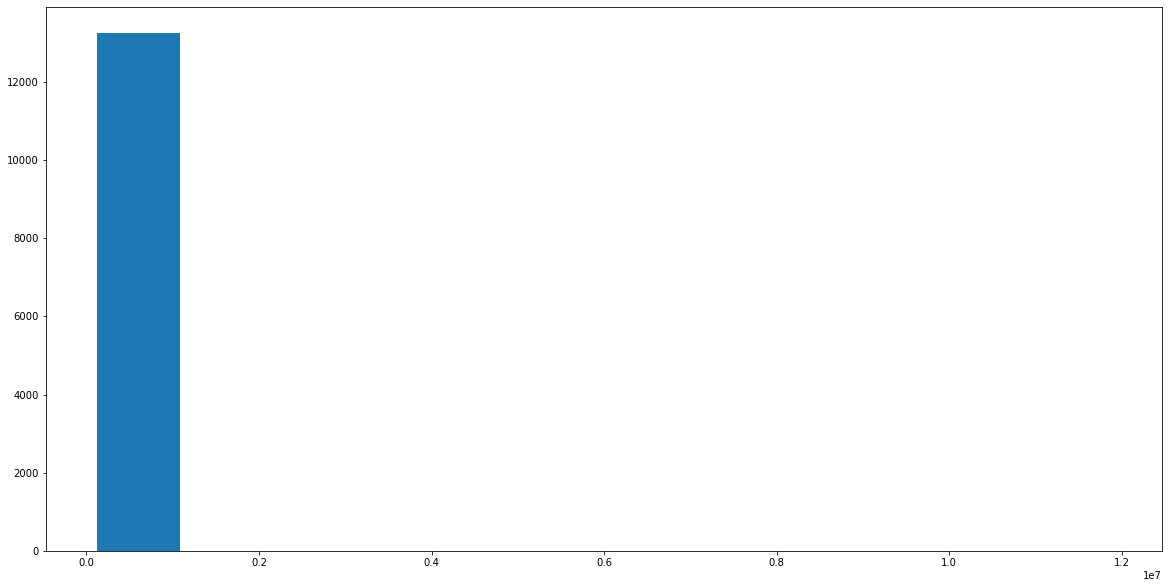

In [67]:
#Properties per sqft area
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
#plt.xlabel("Price Per Square Feet")
#plt.ylabel("Count")

#### So it seems Price Per Square Feet has maximum data points in the range 0-10000 and somewhat represents a gaussian curve

In [68]:
#Removal of outlier in bathroom feature
df7.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

In [69]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5303,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8531,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8618,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9343,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9668,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.756e+03, 1.791e+03, 6.700e+02, 8.000e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

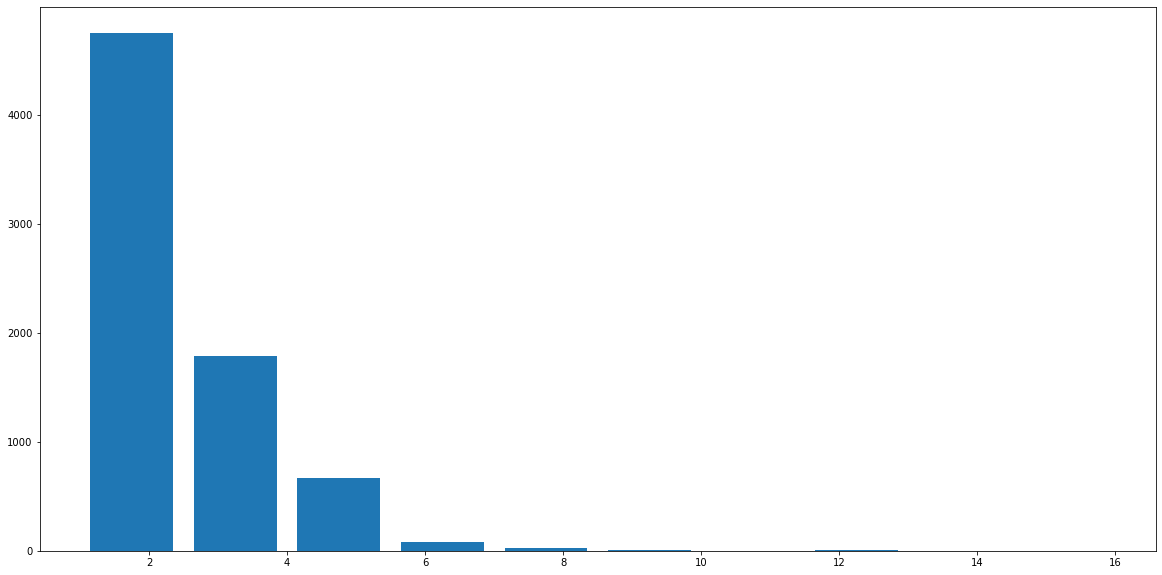

In [70]:
plt.hist(df7.bath,rwidth=0.8)
#plt.xlabel("Numbers of bathroom")
#plt.ylabel('Count')

In [71]:
#Those rows having number of bathrooms more than number of BHK
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5264,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6755,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8460,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [72]:
#To remove the rows having number of bathrooms more than number of BHK
df7 = df7[df7.bath<df7.bhk+2]
df7.shape

(7260, 7)

In [73]:
df8=df7.drop(['size','price_per_sqft'], axis='columns')
df8

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10246,other,1800.0,1.0,200.0,1
10249,other,1353.0,2.0,110.0,2
10250,other,812.0,1.0,26.0,1
10253,other,3600.0,5.0,400.0,4


#### CLEAN DATA

In [99]:
df8.to_csv("Cleaned_Data.csv")

In [74]:
len(df8.location.unique())

254

#### Using ONE HOT ENCODING for conversion of categorical feature to numerical

In [75]:
#To convert categorical data into numerical data for location feature 
dummies_df= pd.get_dummies(df8.location)
dummies_df.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Appending dummies dataset into my existing dataframe

df9= pd.concat([df8,dummies_df.drop('other',axis='columns')],axis='columns')
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10249,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10250,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10253,other,3600.0,5.0,400.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Dropping location column because we already have dummies columns
df10=df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df10.shape

(7260, 257)

In [79]:
#Creating an X variable which is an independent variable and price is dependent variable
X= df10.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10249,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10250,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10253,3600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Y= df10.price
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10246    200.0
10249    110.0
10250     26.0
10253    400.0
10254    480.0
Name: price, Length: 7260, dtype: float64

<AxesSubplot:>

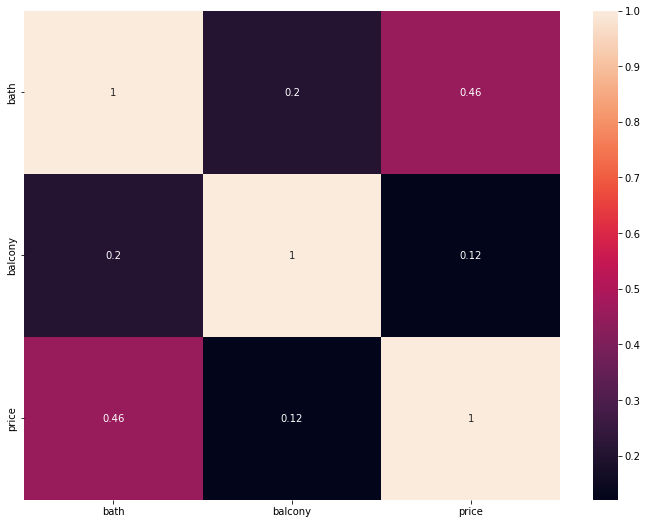

In [81]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(),annot=True)

#### Splitting data into train and test data points

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state= 10)

#80% of data set will be training dataset and 20% of data set will be testing dataset

#### Training our Machine Learning Model on X_train and Y_train dataset using Linear Regression Algorithm     
#### Finding score i.e accuracy using X_test and Y_test dataset

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.851450111984336

#### Doing K-fold cross validation to increase accuracy

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([ 8.83765673e-01, -4.95313055e+13,  8.58110344e-01,  8.50137554e-01,
        8.72197860e-01])

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
       },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
            
        },
        'decision tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','randon']
            }
        }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_params' : gs.best_params_,
            'best_score' : gs.best_score_
        })
        
    return pd.DataFrame(scores,columns=['model','best_params','best_score'])

find_best_model_using_gridsearchcv(X,Y)     

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 381, in fit
    splitter = SPLITTERS[self.splitter](
KeyError: 'randon'

  warnings.warn(some_fits_failed_message,

,model,best_params,best_score
0,linear_regression,{'normalize': True},0.869290
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.737197
2,decision tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.761950


##### Thus, we can conclude that linear regression model is our best model

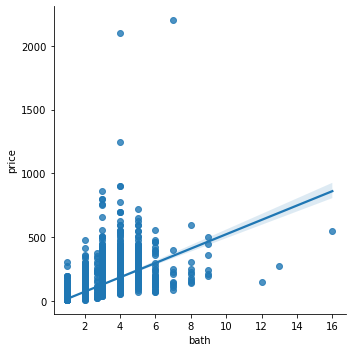

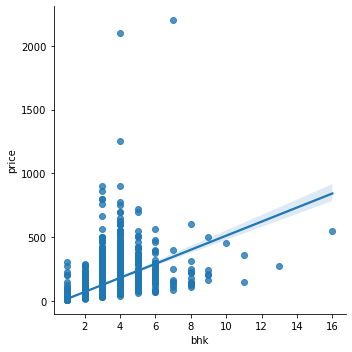

In [86]:
sns.lmplot(x='bath', y='price',data=df10)
sns.lmplot(x='bhk', y='price',data=df10)

#### To predict price of house for the given feature input 

In [ ]:
X.columns

In [87]:
np.where(X.columns=='1st Phase JP Nagar')

(array([4], dtype=int64),)

In [88]:
np.where(X.columns=='1st Phase JP Nagar')[0][0]

4

In [89]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))                      #It's just creating an initial array with only zeros like [0, 0, 0, ...].
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
    
    

In [90]:
 predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.46204306181282

In [91]:
 predict_price('1st Phase JP Nagar',1000, 4, 3)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.85585997301247

In [92]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.0164048983014

In [93]:
predict_price('Indira Nagar',1000, 3, 2)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.41022180950102

In [94]:
predict_price('Indira Nagar',1000, 2, 3)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


178.34793738480562

In [95]:
predict_price('Vishwapriya Layout',5000, 3, 2)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


368.3389484247131

In [96]:
predict_price('Indira Nagar',8000, 2, 5)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


728.7884666792166

In [97]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f :
    pickle.dump(lr_clf,f)
    

In [ ]:
import json
columns = {
     'data_columns' :[col.lower() for col in X.columns]
 }
    
with open('columns.json' ,'w') as f :
        f.write(json.dumps(columns))
   